## Exploration (20 pts)


Like in the first assignment, in this exercise, you have more lattiude and are meant to do creative exploration.  Like before you don't need to write a book chapter, but the intention is for you to go beyond what's been covered above.

Implement a belief network of your own choosing or design.  It should be more complex that the examples above.  It should be discrete (we will cover continous models later). Use the model to illustrate deductive inference problems.


#### Exploration Grading Rubric

Exploration problems will be graded according the elements in the table below.  The scores in the column headers indicate the number of points possible for each rubric element (given in the rows).  A score of zero for an element is possible if it is missing entirely.

|     | Substandard (+1) | Basic (+2) | Good (+3) | Excellent (+5) |
| :-- | :----------- | :---- | :--- | :-------- |
| <b> Pedagogical Value </b> | No clear statement of idea or concept being explored or explained; lack of motivating questions. | Simple problem with adequate motivation; still could be a useful addition to an assignment. | Good choice of problem with effective illustrations of concept(s).  Demonstrates a deeper level of understanding. | Problem also illustrates or clarifies common conceptual difficulties or misconceptions. |
| <b> Novelty of Ideas </b> | Copies existing problem or makes only a trivial modification; lack of citation(s) for source of inspiration. | Concepts are similar to those covered in the assignment but with some modifications of an existing exericse. | Ideas have clear pedagogical motivation; creates different type of problem or exercise to explore related or foundational concepts more deeply. | Applies a technique or explores concept not covered in the assignment or not discussed at length in lecture. | 
| <b> Clarity of Explanation </b> | Little or confusing explanation; figures lack labels or useful captions; no explanation of motivations. | Explanations are present, but unclear, unfocused, wordy or contain too much technical detail. | Clear and concise explanations of key ideas and motivations. | Also clear and concise, but includes illustrative figures; could be read and understood by students from a variety of backgrounds. |
| <b> Depth of Exploration </b> | Content is obvious or closely imitates assignment problems. | Uses existing problem for different data. | Applies a variation of a technique to solve a problem with an interesting motivation; explores a concept in a series of related problems. | Applies several concepts or techniques; has clear focus of inquiry that is approached from multiple directions.|

## Death by Heart Disease
One fairly elusive area to create new insights is in the medical field. Currently, many deep learning algorithms are being used to diagnose diseases, such as using CNNs with MRI inputs to diagnose various cancers. These methods, while accurate, require the use of complex, expensive imaging technologies which can be unsafe if used consistently on the same patient. While they provide great accurate results, the continued use of them to diagnose patients for many diseases/disorders may leave patients with empty pockets and increased disease because of exposure to radiation and high powered magnets. In addition to the costs on the patient required to diagnose, they also require large corpus of examples, which rarely have accurate strata of race/gender/status, to train properly. 

Alternatively, doctors have tons of knowledge of treatments options, but can often be stuck in a rut of trying to diagnose between potential options. To aid doctors and quantify their knowledge, a belief network can be used to provide probabalistic reasoning for a particular disease. In addition to helping physicians, belief models follow the distributions they are given, meaning, regardless of the sample size, if you are confident in the strata and frequency of your inputs, you can be satisfied with the outputs. Below, I have created a belief network for studying heart disease, demonstrating how a physician might be able to take the help of a belief network to better understand the risk of death associated with heart disease based on a person's symptoms.

### Data Cleaning
The dataset used for this exploration does not contain many missing values, but does contain some continuous variables. These continuous variables need to be binned and categorized to create a discrete belief network. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_cont = pd.read_csv("data.csv")
data = data_cont.copy(deep=True)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


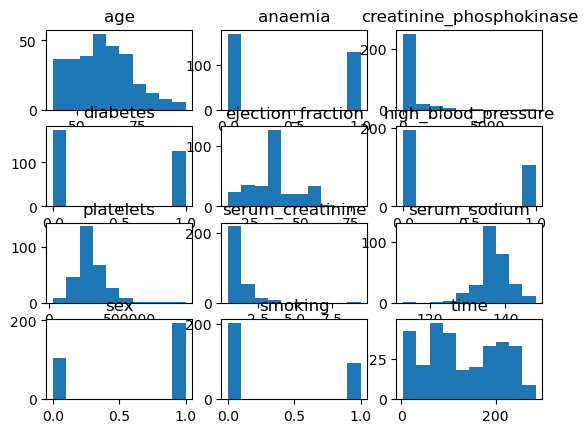

In [4]:
# histogram of each column
cols = data.columns.tolist()

fig, ax = plt.subplots(4, 3)
for i in range(4):
    for j in range(3):
        ax[i,j].hist(data[cols[(i*3) + j]])
        ax[i,j].title.set_text(cols[(i*3) + j])

Based on the quick look at the histograms we can see that age, creatinine_phosphokinase, ejection_fraction, platelets, serum_cretinine, serum_sodium, and time are continuous variables that need to be converted into discrete variables. We can acheive this by binning the data.<br>

Binning the data must be done carefully because in health, both high and low values can be bad. Therefore, we can bin these data into three groups - the bottom 25%, middle 50%, and top 25%, where the middle 50% is regarded are the "normal range". This process of discretizing the data is okay to use as demonstrated by the source of the data: https://www.kaggle.com/datasets/whenamancodes/heart-failure-clinical-records

In [5]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
data.astype("float64").dtypes

age                         float64
anaemia                     float64
creatinine_phosphokinase    float64
diabetes                    float64
ejection_fraction           float64
high_blood_pressure         float64
platelets                   float64
serum_creatinine            float64
serum_sodium                float64
sex                         float64
smoking                     float64
time                        float64
DEATH_EVENT                 float64
dtype: object

In [7]:
# bin the discretized variables
data["sex"] = np.where(data["sex"]==0, "female", "male")
cols.remove("sex")

for c in cols:
    if data[c].max() - data[c].min() == 1:
        data[c] = np.where(data[c]==0, "no", "yes")
        cols.remove(c)

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,no,582,no,20,yes,265000.00,1.9,130,male,no,4,yes
1,55.0,no,7861,no,38,no,263358.03,1.1,136,male,no,6,yes
2,65.0,no,146,no,20,no,162000.00,1.3,129,male,yes,7,yes
3,50.0,yes,111,no,20,no,210000.00,1.9,137,male,no,7,yes
4,65.0,yes,160,yes,20,no,327000.00,2.7,116,female,no,8,yes


We can then bin the continous variables based on what is considered "normal" ranges. These ranges were found from quick google searches after verifying the source was reputable. 

In [8]:
# bin the continuous variables based on what is considered in the normal range
data["creatinine_phosphokinase"] = pd.cut(data["creatinine_phosphokinase"], bins=[0, 10, 120, 10000], labels=["low", "normal", "high"])
data["ejection_fraction"] = pd.cut(data["ejection_fraction"], bins=[0, 40, 50, 70, 100], labels=["very low", "low", "normal", "high"])
data["platelets"] = pd.cut(data["platelets"], bins=[0, 150000, 450000, 1000000], labels=["low", "normal", "high"])
data["serum_creatinine"] = pd.cut(data["serum_creatinine"], bins=[0, 0.67, 1.2, 10], labels=["low", "normal", "high"])
data["serum_sodium"] = pd.cut(data["serum_sodium"], bins=[0, 135, 145, 150], labels=["low", "normal", "high"])

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,no,high,no,very low,yes,normal,high,low,male,no,4,yes
1,55.0,no,high,no,very low,no,normal,normal,normal,male,no,6,yes
2,65.0,no,high,no,very low,no,normal,high,low,male,yes,7,yes
3,50.0,yes,normal,no,very low,no,normal,high,normal,male,no,7,yes
4,65.0,yes,high,yes,very low,no,normal,high,low,female,no,8,yes


Dealing with age and time is a bit more ambiguous, so I am just binning these into quartiles. I am not sure if that is considered bad practice, but it was the easiest way for me to bin these groups

In [9]:
# bin age and time
data["age"] = pd.qcut(data["age"], q=[0, .25, .5, .75, 1], labels=["young","young-mid", "mid-old", "old"])
data["time"] = pd.qcut(data["time"], q=[0, .33, 0.67, 1], labels=["little", "mid", "lots"])

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,old,no,high,no,very low,yes,normal,high,low,male,no,little,yes
1,young-mid,no,high,no,very low,no,normal,normal,normal,male,no,little,yes
2,mid-old,no,high,no,very low,no,normal,high,low,male,yes,little,yes
3,young,yes,normal,no,very low,no,normal,high,normal,male,no,little,yes
4,mid-old,yes,high,yes,very low,no,normal,high,low,female,no,little,yes


## Generating the graph structure

In [10]:
import networkx as nx
from pgmpy.estimators import HillClimbSearch, ExhaustiveSearch, TreeSearch
from matplotlib import pyplot as plt
from graphviz import Digraph

/Users/sakinkirti/opt/anaconda3/envs/pgm/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Generating a graph structure comes from knowing first principles regarding a topic. To do this accurately, I took the help of this paper which denotes the relationships between the variables at my disposal.
https://jamanetwork.com/journals/jamainternalmedicine/fullarticle/1108492.
This paper, however, was not able to give me all the necessary information to generate a graphical structure. Therefore, I generated a graphical structure using the "HillClimbSearch" function in pgmpy. This function uses a heuristic to find an optimal graph. It is important to note that this might not be the most optimal graph, but the use of a heuristic allows this to be somewhat optimized. This was able to give me a structure that I then could begin filling with conditional probabilities.<br><br>
In performing this search, I also tried ExhaustiveSearch and TreeSearch, but found that these could be used with tradeoffs. I found that TreeSearch was suboptimal because it only produced a tree structure with one root node. While this may have been the fastest, it also is the least possibly true because of the complex nature of biology. In trying the ExhaustiveSearch, the time required to run this algorithm was far too long with the small dataset. In trying to run this, it took more than 20 minutes, and running this several times while testing different methods proved far too long.

In [11]:
# find structure of graph
est = HillClimbSearch(data)
graph = est.estimate()

  0%|          | 9/1000000 [00:01<36:58:37,  7.51it/s] 


In [12]:
graph.add_edges_from([("serum_creatinine", "DEATH_EVENT"), ("time", "DEATH_EVENT"), ("diabetes", "time"), ("anaemia", "DEATH_EVENT")])
graph.remove_edges_from([("DEATH_EVENT", "serum_creatinine"), ("DEATH_EVENT", "time")])

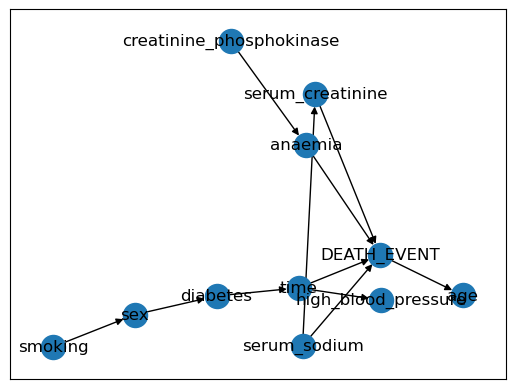

In [13]:
nx_graph = nx.DiGraph(graph.edges())
nx.draw_networkx(nx_graph, pos=nx.kamada_kawai_layout(nx_graph))
plt.show()

Above this graphical structure of my probabalistic model. As can be seen it is fairly complex, and calculating conditional probability distributions would be a hassle considering the number of crossing edges. Therefore, I opted for an automated approach where I fit the model to the given data rather than calculating the probabilities by hand.

## Inputting Probabilities

Now that the graph structure has been defined, we can just fit the model to the data right away rather than inputting the conditional probabilities manually.

In [14]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

In [15]:
# create the model and fit the data
model = BayesianNetwork(graph)
model.fit(data)

# createa an inference model
hd_infer = VariableElimination(model)

## Testing the Model
Now that we have generated our model, we can test it on a few examples.

Below is an example of a healthy female person. Notice that they do not have any disorders and all of their testing levels show they are within normal a range. Based on the trained model, this person has a very low chance of death caused by heart disease, about 10%. One thing I noticed while adding features to query over was that providing evidence for nodes that were closer to the query node provided more of a bump in the probabilities compared with nodes that were levels away from the query node. While this is obvious, seeing this occur as I added evidences to the query made me more interested in what the tabular conditional probability distributions were.

In [16]:
print(hd_infer.query(["DEATH_EVENT"], evidence={"anaemia":"no", 
                                                "smoking":"no", 
                                                "ejection_fraction":"normal", 
                                                "diabetes":"no", 
                                                "platelets":"normal",
                                                "sex":"female",
                                                "age":"young",
                                                "serum_creatinine":"normal"
                                                }))

+------------------+--------------------+
| DEATH_EVENT      |   phi(DEATH_EVENT) |
+==================+====================+
| DEATH_EVENT(no)  |             0.8555 |
+------------------+--------------------+
| DEATH_EVENT(yes) |             0.1445 |
+------------------+--------------------+


The example provided below is one that a friend of mine entered where he tried to enter values based on his uncle. His uncle refuses to go to the doctor to check for heart disease; he therefore wanted to provide his uncle with some evidence of why he should. Although this simple model should not be used as a basis for medical care; if we are to take this model at face value, his uncle has a 35% chance of a death event occuring if he is diagnosed with heart disease. Hopefully a model like this can help patients quantify their health and give doctors better insight into how pressing a certain procedure might be.

In [17]:
print(hd_infer.query(["DEATH_EVENT"], evidence={"age":"old", "diabetes":"yes", "high_blood_pressure":"yes", "sex":"male", "smoking":"yes"}))

+------------------+--------------------+
| DEATH_EVENT      |   phi(DEATH_EVENT) |
+==================+====================+
| DEATH_EVENT(no)  |             0.3340 |
+------------------+--------------------+
| DEATH_EVENT(yes) |             0.6660 |
+------------------+--------------------+


This last example is one of a bad case. It employs the same method as the first example.

In [18]:
print(hd_infer.query(["DEATH_EVENT"], evidence={"smoking":"yes", 
                                                "age":"old", 
                                                "diabetes":"yes",
                                                "serum_creatinine":"high",
                                                "ejection_fraction":"very low",
                                                "sex":"male",
                                                "platelets":"high"
                                                }))

+------------------+--------------------+
| DEATH_EVENT      |   phi(DEATH_EVENT) |
+==================+====================+
| DEATH_EVENT(no)  |             0.2296 |
+------------------+--------------------+
| DEATH_EVENT(yes) |             0.7704 |
+------------------+--------------------+


## Conclusions
This was a short exploration for me to tie my interest in health and medicine together with probabilistic graphical models. I was able to explore moving from a dataset to a model fairly quickly once the data was properly cleaned. Here are a few things that I learned from this exploration:
- Converting a continuous dataset to discrete values
- Generating a graph structure from a tabular dataset using various search methods (I tried TreeSearch, HillClimbSearch, and ExhaustiveSearch) and better understood the pros and cons of using each. 
- automatically fitting a model to data based on a tabular dataset<br><br>

Although much of this exploration was an exercise with a new package for me (pgmpy), I think it was also eye-opening in terms of understanding how much first principles are required to generate a model that is accurate. Here, I used a search method to create the model, but I think I would have preferred the accuracy of generating the model from first principles. Altogether though, this was a good look into using pgmpy to build probabalistic graphical models